In [1]:
import sys
from glob import glob

import h5py
import pygrib
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import preprocess_utils as pu

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import importlib
importlib.reload(du)

<module 'data_utils' from '/glade/u/home/ksha/NCAR/libs/data_utils.py'>

In [5]:
with h5py.File(save_dir+'CONUS_domain.hdf', 'r') as h5io:
    lon = h5io['lon_72km'][...]
    lat = h5io['lat_72km'][...]
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]

* HRRR v2 2017-01-01 - 2018-07-11
* HRRR v3 2018-07-12 - 2020-12-02
* HRRR v4 2020-12-03 - 2022-07-13 (present)

In [6]:
# filename = sorted(glob(HRRR_dir+'fcst12hr/*'))

In [7]:
base_v2_s = datetime(2017, 1, 1)

base_v2_e = datetime(2018, 7, 11)
base_v3_s = datetime(2018, 7, 12)

base_v3_e = datetime(2020, 12, 2)
base_v4_s = datetime(2020, 12, 3)

base_v4_e = datetime(2022, 7, 13)

In [8]:
N_days_v3 = (base_v3_e-base_v3_s).days
N_days_v4 = (base_v4_e-base_v4_s).days

In [9]:
dt_v3 = [base_v3_s + timedelta(days=d) for d in range(N_days_v3)]
dt_v4 = [base_v4_s + timedelta(days=d) for d in range(N_days_v4)]

In [10]:
month_select = [3, 4, 5, 6, 7, 8, 9, 10]

dt_v3_scope = []
dt_v4_scope = []

for dt_temp in dt_v3:
    if dt_temp.month in month_select:
        dt_v3_scope.append(datetime.strftime(dt_temp, HRRR_dir+'fcst12hr/HRRR.%Y%m%d.natf12.grib2'))

for dt_temp in dt_v4:
    if dt_temp.month in month_select:
        dt_v4_scope.append(datetime.strftime(dt_temp, HRRR_dir+'fcst12hr/HRRR.%Y%m%d.natf12.grib2'))

In [11]:
len(dt_v3_scope)

602

In [12]:
len(dt_v4_scope)

379

### Land mask

In [11]:
with pygrib.open(dt_v3_scope[0]) as grbio:
    #var_list = grbio()
    var = grbio.select(name='Land-sea mask')[0]
    land_mask = var.values
    lat_hrrr, lon_hrrr = var.latlons()

In [13]:
land_mask[100:900, 600:] += 5

In [22]:
land_mask[100:900, 600:].shape

(800, 1199)

In [ ]:
800*1199

/glade/scratch/ksha/ipykernel_71283/1596162813.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_hrrr, lat_hrrr, land_mask, vmax=12, cmap=plt.cm.nipy_spectral_r)


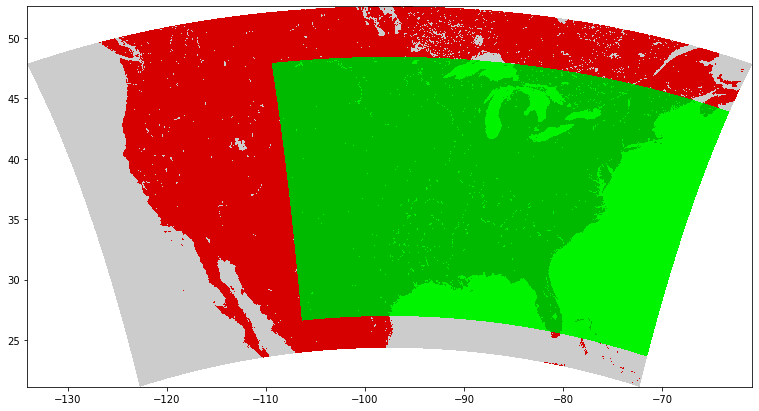

In [20]:
plt.figure(figsize=(13, 7))
plt.pcolormesh(lon_hrrr, lat_hrrr, land_mask, vmax=12, cmap=plt.cm.nipy_spectral_r)
#plt.colorbar()

In [19]:
# var_list = ['10 metre U wind component',
#             '10 metre V wind component',
#             '2 metre temperature',
#             'Surface pressure',
#             'Convective available potential energy',
#             'Convective inhibition',
#             'U-component storm motion',
#             'V-component storm motion',
#             'Storm relative helicity',
#             'Vertical u-component shear',
#             'Vertical v-component shear',
#             'Maximum/Composite radar reflectivity',
# ]

# ind_list = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

# N_vars = len(var_list)

# save_name = ['u10', 'v10', 'T2m', 'slp', 'cape', 'cin', 'us', 'vs', 'heli', 'ushear', 'vshear', 'max_refl']

# dt_v3_scope = dt_v3_scope[:20]

# L_v3 = len(dt_v3_scope)
# grid_shape = lon_hrrr.shape
# out_vars = np.empty((L_v3, N_vars)+grid_shape)

# for i, filename in enumerate(dt_v3_scope):
#     print(filename)
#     with pygrib.open(filename) as grbio:
        
#         for j, varname in enumerate(var_list):
#             try:
#                 var = grbio.select(name=varname)[ind_list[j]]
#                 out_vars[i, j] = var.values
#             except:
#                 print('ergewqgw')
#                 out_vars[i, j] = np.nan

In [14]:
# L_v3 = len(dt_v3_scope[:2])
# grid_shape = lon_hrrr.shape
# out_vars = np.empty((L_v3, N_vars)+grid_shape)

# for i, filename in enumerate(dt_v3_scope[:2]):
#     print(filename)
#     with pygrib.open(filename) as grbio:
        
#         for j, varname in enumerate(var_list):
#             var = grbio.select(name=varname)[ind_list[j]]
#             out_vars[i, j] = var.values

In [19]:
# tuple_save = (land_mask, lon_hrrr, lat_hrrr, out_vars[0], 
#               out_vars[:, 0, ...], out_vars[:, 1, ...], out_vars[:, 2, ...], out_vars[:, 3, ...],
#               out_vars[:, 4, ...], out_vars[:, 5, ...], out_vars[:, 6, ...], out_vars[:, 7, ...],
#               out_vars[:, 8, ...], out_vars[:, 9, ...], out_vars[:, 10, ...])

# label_save = ['land_mask', 'lon', 'lat',] + save_name

# du.save_hdf5(tuple_save, label_save, save_dir_scratch, 'HRRRv3_envi.hdf')

Save to /glade/scratch/ksha/DRIVE/SPC_3km_grid/HRRRv3_envi.hdf


In [15]:
with h5py.File('/glade/scratch/ksha/DRIVE/SPC_3km_grid/HRRRv3_envi.hdf', 'r') as h5io:
    lon = h5io['lon'][...]
    lat = h5io['lat'][...]
    land_mask = h5io['land_mask'][...]
    max_refl_v3 = h5io['max_refl'][...]

In [47]:
with h5py.File('/glade/scratch/ksha/DRIVE/SPC_3km_grid/HRRRv4_envi.hdf', 'r') as h5io:
    lon = h5io['lon'][...]
    lat = h5io['lat'][...]
    land_mask = h5io['land_mask'][...]
    max_refl_v4 = h5io['max_refl'][...]

In [38]:
u10_v4.shape

(10, 1059, 1799)

In [101]:
with pygrib.open(HRRR_dir+'hrrr.t00z.wrfnatf12.grib2') as grbio:
    var_list = grbio()
    # var = grbio.select(name='10 metre U wind component')[0]
    # u = var.values
    # var = grbio.select(name='Surface pressure')[0]
    # p = var.values
    # lat_hrrr, lon_hrrr = var.latlons()

/glade/scratch/ksha/ipykernel_59344/3136218662.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_hrrr, lat_hrrr, u)


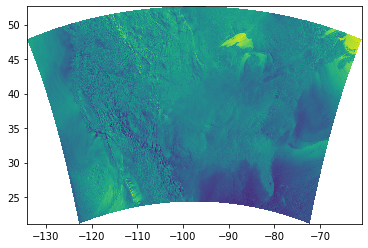

In [95]:
plt.pcolormesh(lon_hrrr, lat_hrrr, u)

/glade/scratch/ksha/ipykernel_59344/3250975271.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_hrrr, lat_hrrr, p/100)


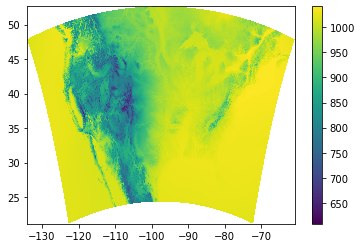

In [100]:
plt.pcolormesh(lon_hrrr, lat_hrrr, p/100)
plt.colorbar()

In [102]:
for var_name in var_list:
    print(var_name)

1:Pressure:Pa (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
2:Cloud mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
3:82:82 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
4:Rain mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
5:Snow mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
6:Graupel (snow pellets):kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
7:28:28 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
8:29:29 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
9:100:100 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
10:Particulate matter (fine):(10**-6 g) m**-3 (instant):lambert:hybrid:level 1:fcst time 12 hrs:from 202012300000
11:Particulate matter (coarse):(10**-6 g) m**-3 (instant):lambert:hybrid:level 1:fcst time 12 hrs:fr